## Composite Analysis

In [70]:
# import all necessary packages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cart
from cartopy.util import add_cyclic_point
import calendar

In [2]:
# Load data
file_path = r'C:\Users\rbendopa\OneDrive - George Mason University - O365 Production\Class\Clim680\data\ao.long.nc'
ao = xr.open_dataset(file_path)
ao

<xarray.Dataset> Size: 11kB
Dimensions:  (time: 896)
Coordinates:
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2024-08-01
Data variables:
    value    (time) float32 4kB ...

In [4]:
ao = ao.sel(time=slice('1950-01-01', '2019-12-31'))
ao

<xarray.Dataset> Size: 10kB
Dimensions:  (time: 840)
Coordinates:
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2019-12-01
Data variables:
    value    (time) float32 3kB ...

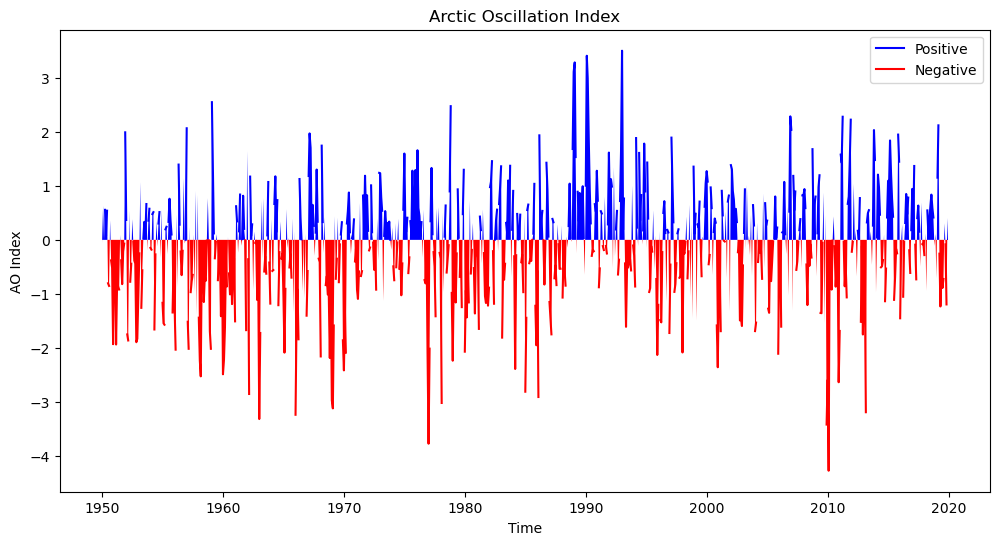

In [6]:
#set positive and negative values
ao_pos = ao.where(ao['value'] > 0)
ao_neg = ao.where(ao['value'] < 0)

# change the color of the line based on the value
plt.figure(figsize=(12,6))  #set the size of the plot
plt.plot(ao_pos['time'],ao_pos['value'],'b',label='Positive')
plt.plot(ao_neg['time'],ao_neg['value'],'r',label='Negative')

# fill between the positive and negative values
plt.fill_between(ao['time'].values,0,ao['value'],where=ao['value']>=0,facecolor='blue',interpolate=True)
plt.fill_between(ao['time'].values,0,ao['value'],where=ao['value']<=0,facecolor='red',interpolate=True)

plt.title('Arctic Oscillation Index')  #add a title
plt.ylabel('AO Index')  #add a y-axis label
plt.xlabel('Time')  #add an x-axis label
plt.legend()    #add a legend
plt.show()  #show the plot

In [12]:
counts = [ao.where(ao['value'] > 0).count(dim='time').values,
          ao.where(ao['value'] < 0).count(dim='time').values] 
print(counts)

[<bound method Mapping.values of <xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    value    int64 8B 394>, <bound method Mapping.values of <xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    value    int64 8B 446>]


## Load Ice concentration dataset

In [14]:
# Open the file with the ice concentration data
file = r"C:\Users\rbendopa\OneDrive - George Mason University - O365 Production\Class\Clim680\data\icec.mon.mean.nc"
ds_icec = xr.open_dataset(file)

# Select the time period
ds_icec = ds_icec.sel(time=slice(ao['time'][0],ao['time'][-1]))
ds_icec

<xarray.Dataset> Size: 218MB
Dimensions:  (lat: 180, lon: 360, time: 840)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2019-12-01
Data variables:
    icec     (time, lat, lon) float32 218MB ...
Attributes:
    title:            created 05/2014 from data provided by JRA
    history:          Created 12/2012 from data obtained from JRA by ESRL/PSD
    platform:         Analyses
    citation:         Hirahara, S., Ishii, M., and Y. Fukuda,2014: Centennial...
    institution:      NOAA ESRL/PSD
    Conventions:      CF-1.2
    dataset_title:    COBE-SST2 Sea Surface Temperature and Ice
    original_source:  https://climate.mri-jma.go.jp/pub/ocean/cobe-sst2/
    References:       https://www.psl.noaa.gov/data/gridded/cobe2.html

## Calculate Climatology

In [15]:
# Calculate climatology
clim = ds_icec.groupby('time.month').mean('time')
ds_anom = ds_icec.groupby('time.month') -clim
ds_anom

<xarray.Dataset> Size: 218MB
Dimensions:  (lat: 180, lon: 360, time: 840)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2019-12-01
    month    (time) int64 7kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    icec     (time, lat, lon) float32 218MB 0.005286 0.005571 0.005 ... nan nan

In [17]:
# Normalize the data
var = ds_anom['icec']

#Min-Max Normalization
min_icec = var.min(dim='time')
max_icec = var.max(dim='time')
norm_icec = (var - min_icec)/(max_icec - min_icec)

#Add the normalized data to the dataset
ds_anom['norm_icec'] = norm_icec
ds_anom


<xarray.Dataset> Size: 435MB
Dimensions:    (lat: 180, lon: 360, time: 840)
Coordinates:
  * lat        (lat) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * lon        (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2019-12-01
    month      (time) int64 7kB 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    icec       (time, lat, lon) float32 218MB 0.005286 0.005571 ... nan nan
    norm_icec  (time, lat, lon) float32 218MB 0.9463 0.9476 0.9459 ... nan nan

In [18]:
# Standardization
icec_std = ds_anom['icec'].std(dim='time')

#Add the standardized data to the dataset
ds_anom['std_icec'] = icec_std
ds_anom



c:\Users\rbendopa\.conda\envs\climate\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


<xarray.Dataset> Size: 436MB
Dimensions:    (lat: 180, lon: 360, time: 840)
Coordinates:
  * lat        (lat) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * lon        (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2019-12-01
    month      (time) int64 7kB 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    icec       (time, lat, lon) float32 218MB 0.005286 0.005571 ... nan nan
    norm_icec  (time, lat, lon) float32 218MB 0.9463 0.9476 0.9459 ... nan nan
    std_icec   (lat, lon) float32 259kB 0.03449 0.03474 0.03459 ... nan nan nan

In [73]:
# Set a extent for the maps
extent = [-180, -100, 45, 80]

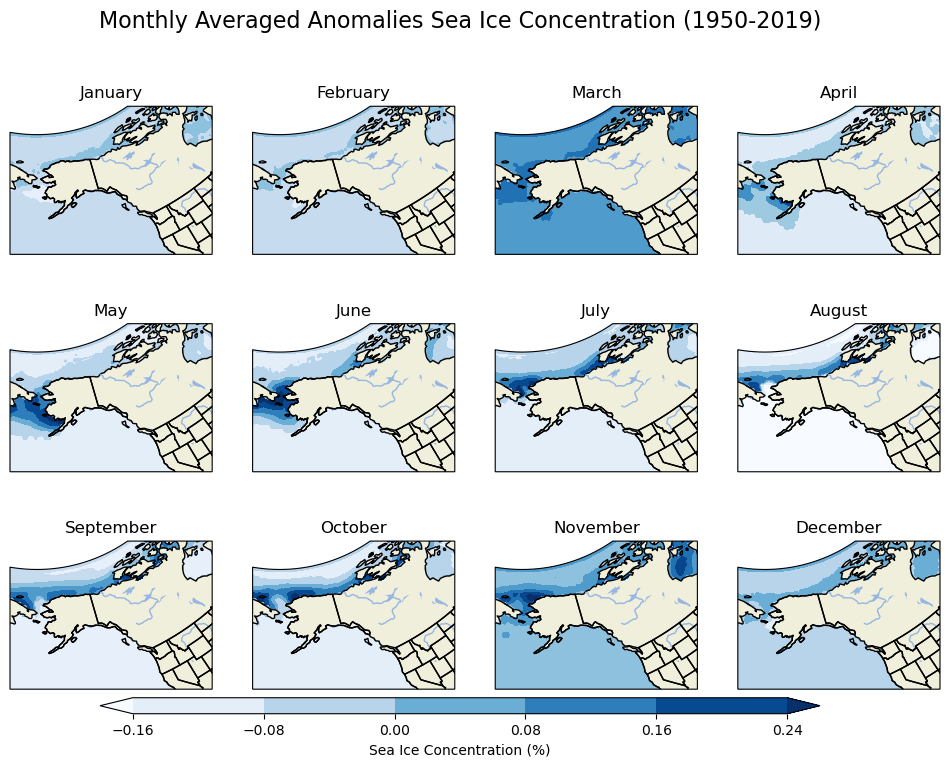

In [74]:
#Define the figure and the axir for the 3 rows and 4 columns
fig, axs = plt.subplots(nrows=3, ncols=4, 
                        subplot_kw= {'projection': ccrs.AlbersEqualArea(central_longitude=-170, central_latitude=60)},
                        figsize=(12, 8))

# we will flatten it into a 1D array
axs = axs.flatten()

# Loop over the months and plot the ice concentration
for i, ax in enumerate(axs):
    ax.set_extent(extent)
    ax.add_feature(cart.LAND)
    ax.add_feature(cart.COASTLINE)
    ax.add_feature(cart.BORDERS)
    ax.add_feature(cart.RIVERS)
    ax.add_feature(cart.STATES)
    ax.add_feature(cart.LAKES)
    ax.add_feature(cart.OCEAN)

    cs = ax.contourf(ds_anom['lon'], ds_anom['lat'], ds_anom['icec'][i],
                        transform=ccrs.PlateCarree(), cmap='Blues', extend='both')
        
    ax.set_title(calendar.month_name[i+1])

# Add a colorbar below the plots
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')

cbar.set_label('Sea Ice Concentration (%)')
fig.suptitle('Monthly Averaged Anomalies Sea Ice Concentration (1950-2019)', fontsize=16)  
plt.show()

# Select dates that match AO positive e AO Negative

In [21]:
# Select the ice concentration data when the AO is positive
icec_ao_pos = ds_anom.sel(time=ao_pos.dropna(dim='time')['time']).mean(dim='time')
icec_ao_neg = ds_anom.sel(time=ao_neg.dropna(dim='time')['time']).mean(dim='time')
print(icec_ao_pos)

<xarray.Dataset> Size: 780kB
Dimensions:    (lat: 180, lon: 360)
Coordinates:
  * lat        (lat) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * lon        (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    icec       (lat, lon) float32 259kB -0.001442 -0.001443 ... nan nan
    norm_icec  (lat, lon) float32 259kB 0.9259 0.9264 0.9263 ... nan nan nan
    std_icec   (lat, lon) float32 259kB 0.03449 0.03474 0.03459 ... nan nan nan


In [22]:
comp_icec = [icec_ao_pos, icec_ao_neg]

In [25]:
# Set a extent for the maps
extent = [-180, -100, 45, 80]

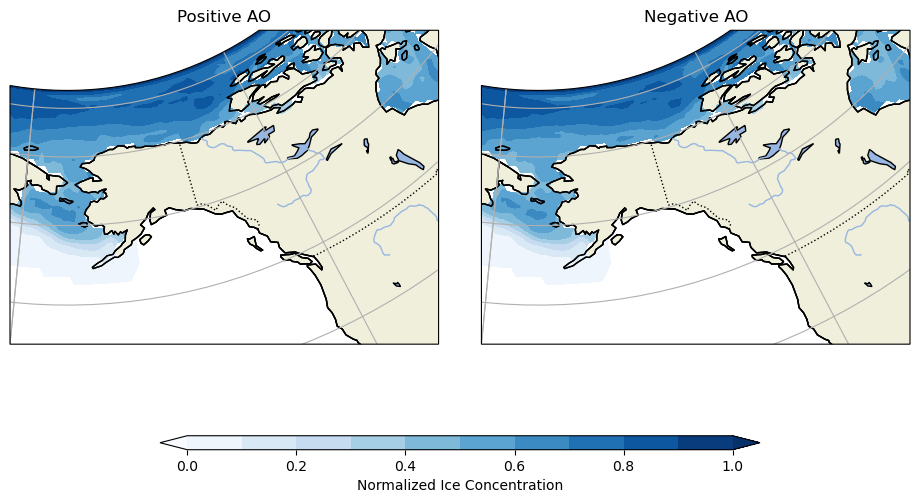

In [65]:
### Panel plots for Positive and Negative AO
fig, axs = plt.subplots(1,2,
                        figsize=(10,7),
                        subplot_kw={'projection': ccrs.AlbersEqualArea(central_longitude=-170, central_latitude=60)})

labels = ['Positive AO', 'Negative AO']
clevs = np.arange(0,1.1,0.1)

# Loop over the two AO phases composite arrays
for i, ax in enumerate(axs.flat):
    data = comp_icec[i]['norm_icec']
    lon = comp_icec[i]['lon']
    lat = comp_icec[i]['lat']

    #set the extent
    ax.set_extent(extent)
    
    # Add cyclic point
    data_cyc, lon_cyc = add_cyclic_point(data, coord=lon)
    
    # Contour plot
    cs = ax.contourf(lon_cyc, lat, data_cyc, clevs,
                     transform=ccrs.PlateCarree(),
                     cmap='Blues', extend='both')
    
    # Add style to the map
    ax.coastlines()
    ax.add_feature(cart.BORDERS, linestyle=':')
    ax.add_feature(cart.COASTLINE)
    ax.add_feature(cart.LAND, edgecolor='black')
    ax.add_feature(cart.LAKES, edgecolor='black')
    ax.add_feature(cart.RIVERS)
    # Add gridlines
    ax.gridlines()
    
    # Add title
    ax.set_title(f'{labels[i]}')

# Add colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Normalized Ice Concentration')

plt.show()


# Selecting a point to create a scatter point for AO index

ValueError: x and y must be the same size

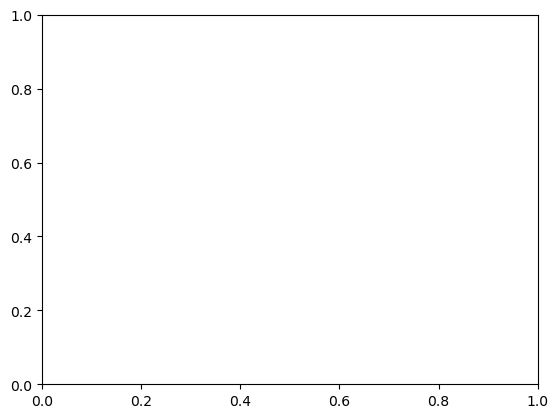

In [42]:
# Select a point in the Arctic Ocean

pt = comp_icec[0].sel(lat=70, lon=-160, method='nearest')
plt.scatter(pt['norm_icec'], ao['value'])
plt.xlabel('Normalized Ice Concentration')
plt.ylabel('AO Index')
plt.title('Ice Concentration at 70N, 160W')

plt.axhline(0, color='gray', linestyle='--')
plt.show()

In [48]:
diff_icec = [icec_ao_neg-icec_ao_pos]
print(diff_icec)

[<xarray.Dataset> Size: 780kB
Dimensions:    (lat: 180, lon: 360)
Coordinates:
  * lat        (lat) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * lon        (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    icec       (lat, lon) float32 259kB 0.002715 0.002718 0.002734 ... nan nan
    norm_icec  (lat, lon) float32 259kB 0.008228 0.008236 0.008284 ... nan nan
    std_icec   (lat, lon) float32 259kB 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan]


## Panel plots for Differences

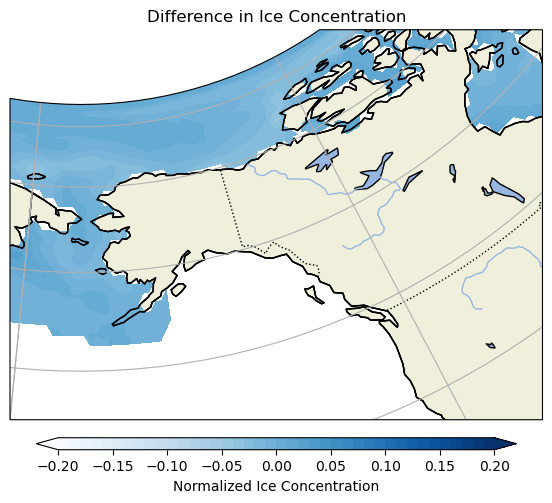

In [53]:
# Plot the difference between the two phases
fig, ax = plt.subplots(1, 1, figsize=(8, 6),
                       subplot_kw={'projection': ccrs.AlbersEqualArea(central_longitude=-170, central_latitude=60)})
clevs = np.arange(-0.2, 0.21, 0.01)

data = diff_icec[0]['norm_icec']
lon = diff_icec[0]['lon']
lat = diff_icec[0]['lat']

ax.set_extent(extent)

data_cyc, lon_cyc = add_cyclic_point(data, coord=lon)

cs = ax.contourf(lon_cyc, lat, data_cyc, clevs,
                 transform=ccrs.PlateCarree(),
                 cmap='Blues', extend='both')

ax.coastlines()
ax.add_feature(cart.BORDERS, linestyle=':')
ax.add_feature(cart.COASTLINE)
ax.add_feature(cart.LAND, edgecolor='black')
ax.add_feature(cart.LAKES, edgecolor='black')
ax.add_feature(cart.RIVERS)
ax.gridlines()

ax.set_title('Difference in Ice Concentration')

fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Normalized Ice Concentration')

plt.show()

## Calculate Significance Using the built-in Stats Function

In [54]:
p=0.05 # Pick a level of significance 

In [56]:
from scipy.stats import ttest_ind

positive_ao_vals = ds_anom['norm_icec'].sel(time = ao_pos.dropna(dim='time')['time'])
negative_ao_vals = ds_anom['norm_icec'].sel(time = ao_neg.dropna(dim='time')['time'])

ttest_icec, pval_icec = ttest_ind(positive_ao_vals, negative_ao_vals, equal_var=False)


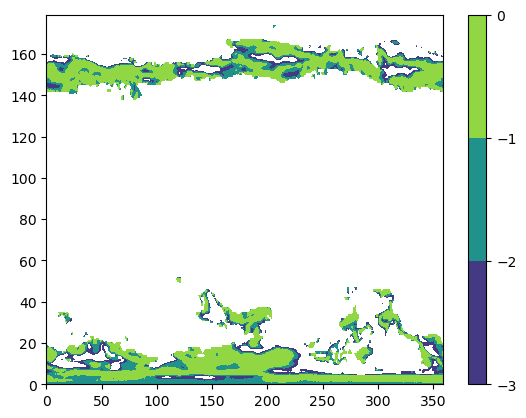

In [57]:
plt.contourf(np.log(pval_icec), levels=[-3, -2, -1, 0], cmap='viridis')
plt.colorbar()

## Next, make a mask where the value is significant

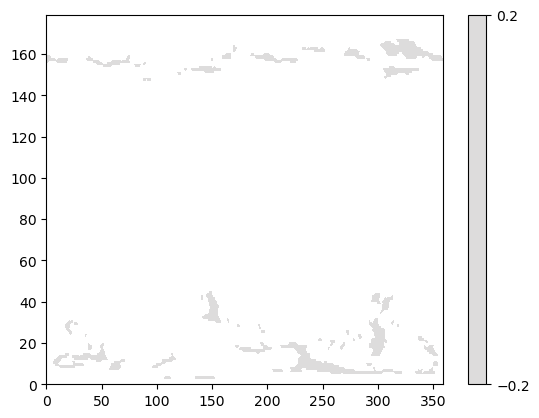

In [58]:
mask_diff = diff_icec[0]['norm_icec'].where(pval_icec < p)
plt.contourf(mask_diff, levels=[-0.2, 0.2], cmap='coolwarm')
plt.colorbar()
    

## Finally, plot the differences between composites, and also mark where it is significant

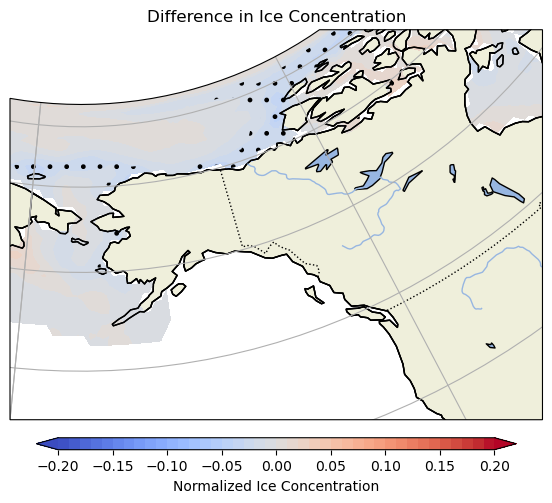

In [ ]:
# Plot the difference between the two phases
fig, ax = plt.subplots(1, 1, figsize=(8, 6),
                       subplot_kw={'projection': ccrs.AlbersEqualArea(central_longitude=-170, central_latitude=60)})
hatch_levs = [-0.1, 0.1]
clevs = np.arange(-0.2, 0.21, 0.01)

axes = [ax]
data = diff_icec[0]['norm_icec']

for i, ax in enumerate(axes):
    lon = diff_icec[0]['lon']
    lat = diff_icec[0]['lat']

    ax.set_extent(extent)

    data_cyc, lon_cyc = add_cyclic_point(data, coord=lon, axis=1)

    cs = ax.contourf(lon_cyc, lat, data_cyc, clevs,
                     transform=ccrs.PlateCarree(),
                     cmap='coolwarm', extend='both')
    
    mask_diff_cyc, _ = add_cyclic_point(mask_diff, coord=lon, axis=1)
    ax.contourf(lon_cyc, lat, mask_diff_cyc, levels=hatch_levs, hatches=['.'], colors='none',
                transform=ccrs.PlateCarree())
    
    ax.coastlines()
    ax.add_feature(cart.BORDERS, linestyle=':')
    ax.add_feature(cart.COASTLINE)
    ax.add_feature(cart.LAND, edgecolor='black')
    ax.add_feature(cart.LAKES, edgecolor='black')
    ax.add_feature(cart.RIVERS)
    ax.gridlines()

    ax.set_title('Difference in Ice Concentration')

fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Normalized Ice Concentration')

plt.show()
